<a href="https://colab.research.google.com/github/ju-sants/biblioteca-pandas-matplotlib-plotly/blob/main/pequenas_analises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install plotly
%pip install chart-studio
%pip install cufflinks

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 5

In [ ]:
import cufflinks as cf
import chart_studio.plotly as py

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
varejo = pd.read_excel('varejo.xlsx')
clientes = pd.read_excel('cliente_varejo.xlsx')

In [ ]:
varejo.head()

,idcanalvenda
0,Mobile
1,Mobile
2,Mobile
3,Aplicativo
4,Mobile


In [ ]:
varejo[['Preço', 'Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,79926.000000,80228.000000
mean,906.589129,908.619823
std,1059.607721,1057.583101
min,6.320000,6.320000
25%,144.320000,150.706000
50%,531.240000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
varejo[varejo['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones e Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar e Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar e Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones e Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones e Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs e Acessorios,NaN,17784


In [ ]:
varejo['estado'].fillna('MS', inplace=True)
varejo['Preço'].fillna(varejo['Preço'].mean(), inplace=True)
varejo['idcanalvenda'] = varejo['idcanalvenda'].str.replace('APP', 'Aplicativo')
varejo['Nome_Departamento'] = varejo['Nome_Departamento'].str.replace(' ', '_')
varejo['Nome_Departamento'] = varejo['Nome_Departamento'].str.replace(',', '')

In [ ]:
vendas_correto = varejo.query('Preço < Preço_com_frete')
vendas_errado = varejo.query('Preço > Preço_com_frete')

In [ ]:
varejo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
clientes = clientes.astype({
    'renda': 'float'
})

<Figure size 1200x800 with 0 Axes>

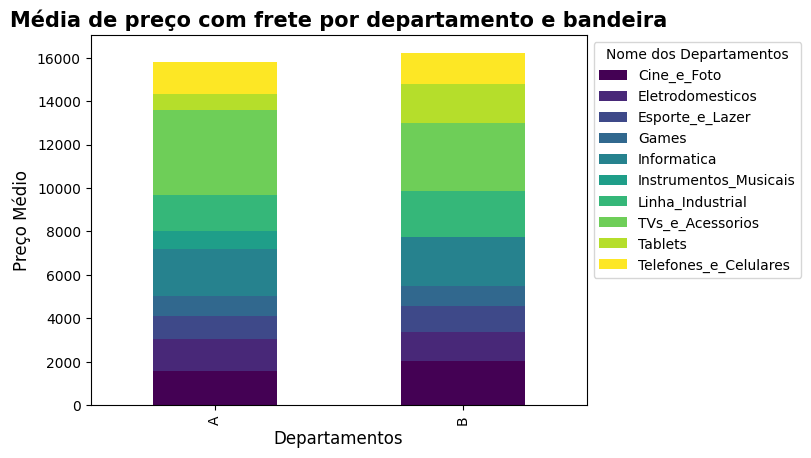

In [ ]:
media_pf_d = vendas_correto.groupby(['Nome_Departamento', 'bandeira']).Preço_com_frete.mean().sort_values(ascending=False).reset_index()
categorias = media_pf_d['Nome_Departamento'].unique()[:10]
media_pf_d = media_pf_d[media_pf_d['Nome_Departamento'].isin(categorias)]

media_pf_d_pivot = media_pf_d.pivot_table(index='bandeira', columns='Nome_Departamento', values='Preço_com_frete')

plt.figure(figsize=(12, 8))
media_pf_d_pivot.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Média de preço com frete por departamento e bandeira', loc='center', color='black', fontsize=15, fontweight='bold')
plt.xlabel('Departamentos', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.legend(title='Nome dos Departamentos', bbox_to_anchor=(1, 1), loc='upper left')

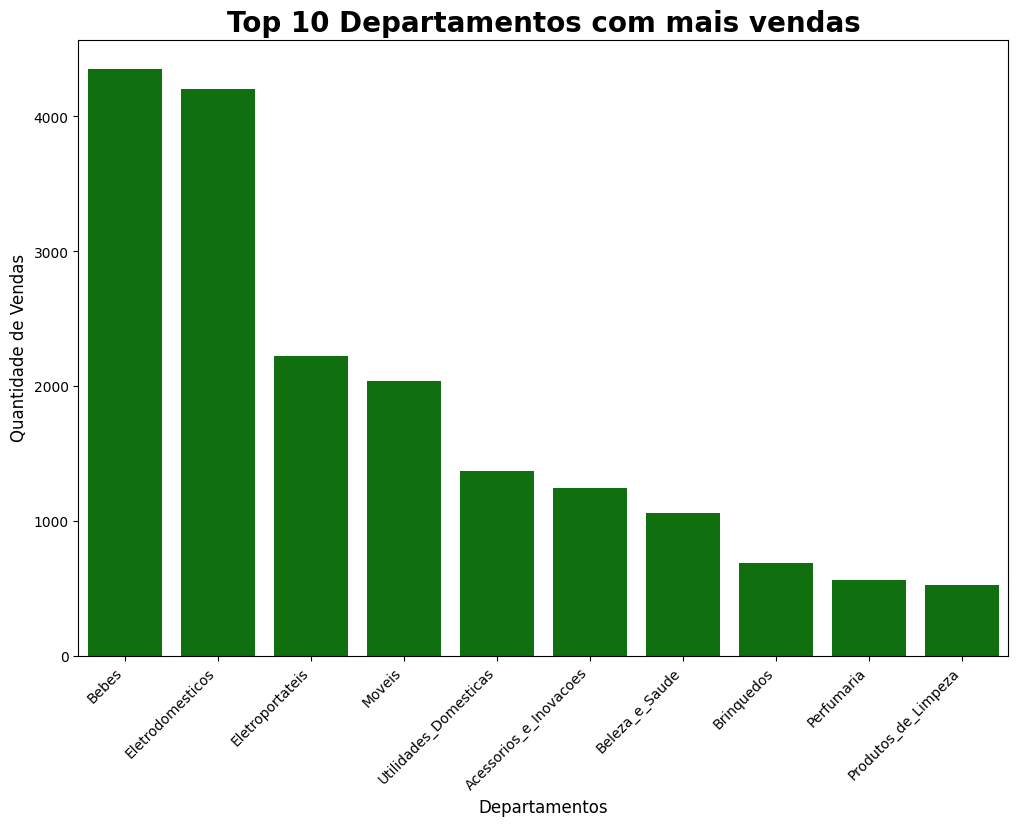

In [ ]:
top10_dep_vendas = vendas_correto.groupby('Nome_Departamento')['idcompra'].nunique().sort_values(ascending=False).reset_index()
categorias = top10_dep_vendas['Nome_Departamento'].unique()[:10]
top10_dep_vendas = top10_dep_vendas[top10_dep_vendas['Nome_Departamento'].isin(categorias)]

plt.figure(figsize=(12, 8))
sns.barplot(data=top10_dep_vendas, x='Nome_Departamento', y='idcompra', color='green')

plt.title('Top 10 Departamentos com mais vendas', loc='center', fontsize=20, color='black', fontweight='bold')
plt.xlabel('Departamentos', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)

plt.xticks(rotation=45, ha='right');


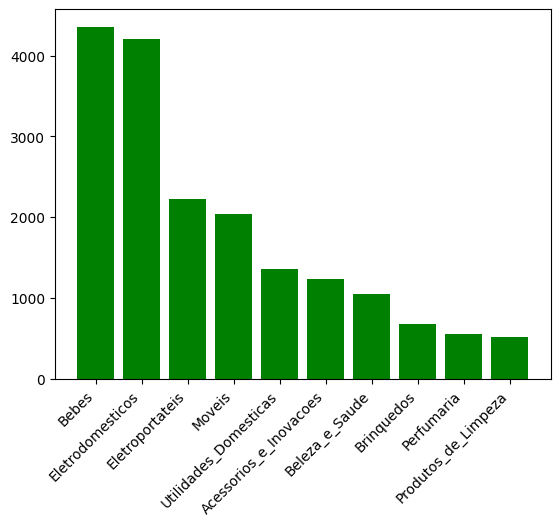

In [136]:
x = top10_dep_vendas['Nome_Departamento']
y = top10_dep_vendas['idcompra']
plt.bar(x, y, color='green');
plt.xticks(rotation=45, ha='right');

In [ ]:
px.bar(top10_dep_vendas,
       x=x, y=y,
       title='Top 10 Departamento em vendas',
       labels={x.name: 'Departamentos', y.name: 'Quantidade de vendas'},
       text=y
       )

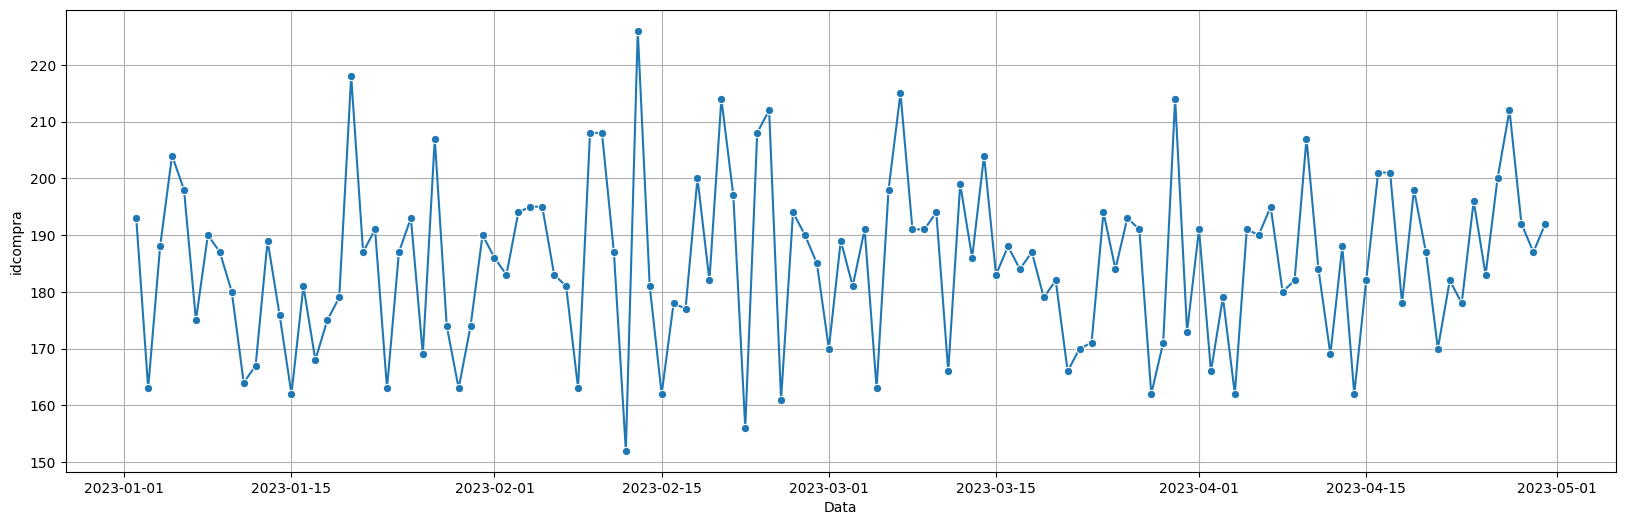

In [ ]:
vendas_correto['Mês'] = vendas_correto['Data'].dt.month

qtd_ven_tempo = vendas_correto.groupby('Data').idcompra.nunique().reset_index()
qtd_ven_mes = vendas_correto.groupby('Mês').idcompra.nunique().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20, 6))
sns.lineplot(data=qtd_ven_tempo, x='Data', y='idcompra', marker='o')
plt.grid(True)

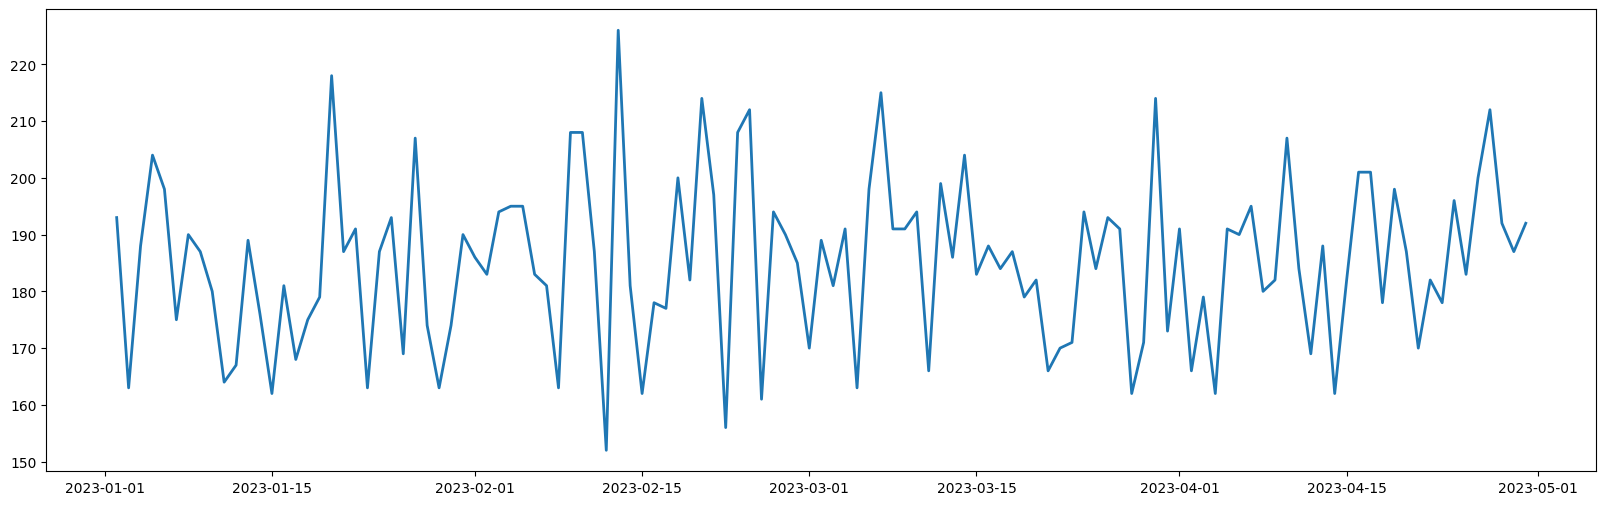

In [ ]:
x = qtd_ven_tempo['Data']
y = qtd_ven_tempo['idcompra']

plt.figure(figsize=(20, 6))
plt.plot(x, y, linewidth='2')

In [ ]:
px.line(x=x, y=y, markers=True)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
vendas_correto_cliente = vendas_correto.merge(clientes, on='cliente_Log')

media_renda_cnv = vendas_correto_cliente.groupby('idcanalvenda').renda.mean()
media_renda_cnv

,renda
idcanalvenda,
Aplicativo,8244.851376
Internet,8211.844949
Mobile,8222.717801
